## Observations and Insights 

In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem, linregress
from matplotlib.pyplot import pie, axis, show

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_id = pd.merge(mouse_metadata, study_results, on="Mouse ID")
mouse_id.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice in the DataFrame.
mouse_id['Mouse ID'].value_counts().head()

g989    13
l733    10
k403    10
l661    10
a520    10
Name: Mouse ID, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data = mouse_id.set_index('Mouse ID')
mouse = duplicate_data.loc['g989', :]
mouse.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_data = duplicate_data.drop(index = 'g989')
new_data = new_data.reset_index()
new_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
new_data['Mouse ID'].value_counts().head()

l733    10
k210    10
f345    10
k403    10
l661    10
Name: Mouse ID, dtype: int64

## Summary Statistics

In [57]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary = new_data.describe()
summary
# This method is the most straightforward, creating multiple series and putting them all together at the end.

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,12.757979,25.660106,19.606383,50.435293,1.025000
std,7.181998,3.935064,14.094238,8.914197,1.139971
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.933454,1.000000
75%,19.250000,29.000000,30.000000,56.324075,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [24]:
tumor_SE = new_data.groupby(["Drug Regimen", "Timepoint"]).sem()["Tumor Volume (mm3)"]
tumor_SE_df = pd.DataFrame(tumor_SE) 
tumor_SE_df = tumor_SE_df.reset_index()
tumor_SE_df.head()

,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [59]:
tumors = pd.merge(summary, tumor_SE_df , on= "Timepoint")
tumors.head()

/Users/poojanagrecha/opt/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:1097: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3)_x,Metastatic Sites,Drug Regimen,Tumor Volume (mm3)_y
0,1.0,15.0,0.0,22.050126,0.0,Capomulin,0.0
1,1.0,15.0,0.0,22.050126,0.0,Ceftamin,0.0
2,1.0,15.0,0.0,22.050126,0.0,Infubinol,0.0
3,1.0,15.0,0.0,22.050126,0.0,Ketapril,0.0
4,1.0,15.0,0.0,22.050126,0.0,Naftisol,0.0


In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_table =new_data.groupby(["Drug Regimen"]).agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
summary_table.head()
# This method produces everything in a single groupby function.

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

## Bar Plots

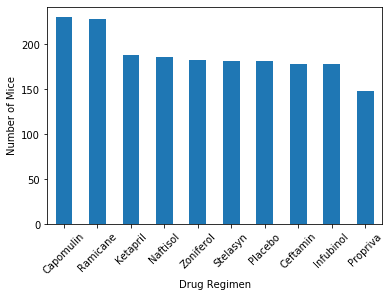

In [32]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
bar =new_data["Drug Regimen"].value_counts()
bar.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=45)
plt.ylabel("Number of Mice")
plt.show()

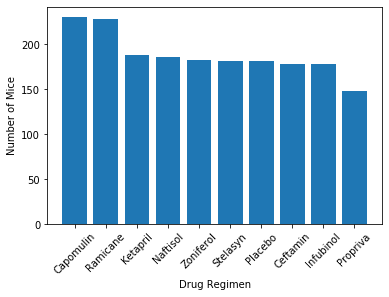

In [42]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
barplt = new_data["Drug Regimen"].value_counts()
plt.bar(barplt.index.values,counts.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=45)
plt.ylabel("Number of Mice")
plt.show()

## Pie Plots

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = new_data['Sex'].value_counts()
gender.head()

Male      958
Female    922
Name: Sex, dtype: int64

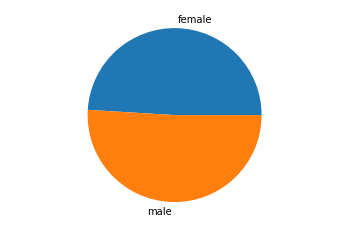

In [52]:
gender_df = pd.DataFrame({'Sex': ['female', 'male'],'Distribution': [922 ,958]})
sums = gender_df.Distribution.groupby(gender_df.Sex).sum()
axis('equal');
pie(sums, labels=sums.index);
show()

/Users/poojanagrecha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


([<matplotlib.patches.Wedge at 0x1a30f8af90>,
 [Text(-1.0770538801350622, -0.22350601621881916, 'Male'),
  Text(1.0770538801350624, 0.22350601621881855, 'Female')],
 [Text(-0.5874839346191248, -0.12191237248299225, '51.0%'),
  Text(0.5874839346191248, 0.12191237248299192, '49.0%')])

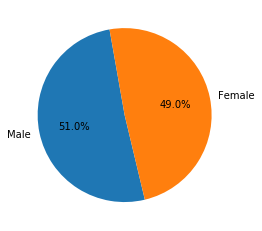

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_df1 = pd.DataFrame(new_data['Sex'].value_counts())
labels = ['Male', 'Female']
plt.pie(gender_df1, labels=labels, autopct = '%1.1f%%', startangle=100)

## Quartiles, Outliers and Boxplots

In [60]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
drug_df = new_data.groupby(["Mouse ID", "Drug Regimen"])
final_volume = drug_df['Tumor Volume (mm3)'].sum()
final_volume.head()

Mouse ID  Drug Regimen
a203      Infubinol       563.127077
a251      Infubinol       552.370946
a262      Placebo         586.116306
a275      Ceftamin        527.709651
a366      Stelasyn        382.479341
Name: Tumor Volume (mm3), dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1a31ed8950>,
 'caps': [<matplotlib.lines.Line2D at 0x1a31edc4d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a31ec5dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a31edced0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a31ee2450>],
 'means': []}

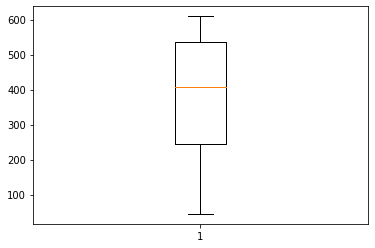

In [61]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.boxplot(final_volume)

## Line and Scatter Plots

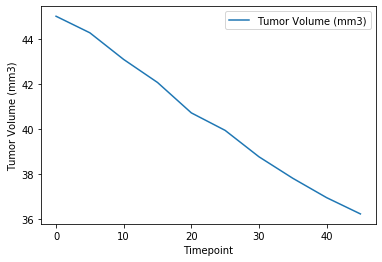

In [62]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
tumor = new_data.drop(["Mouse ID"],axis = 1)
tumor_index= tumor.groupby(["Drug Regimen", "Timepoint"]).mean()
tumor_index = tumor_index.reset_index()

capumolin =tumor_index.loc[tumor_index["Drug Regimen"]=="Capomulin"]
ax = plt.gca()

capumolin.plot(kind='line',x="Timepoint",y="Tumor Volume (mm3)", ax=ax)
plt.ylabel('Tumor Volume (mm3)')

plt.show()

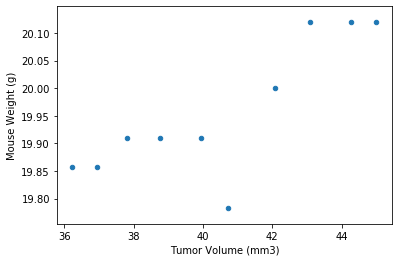

In [64]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
tumor = new_data.drop(["Mouse ID", "Metastatic Sites"], axis =1)
tumor_index= tumor.groupby(["Drug Regimen", "Timepoint"]).mean()
tumor_index = tumor_index.reset_index()

capumolin =tumor_index.loc[tumor_index["Drug Regimen"]=="Capomulin"]

capumolin.plot.scatter(y = "Weight (g)", x = "Tumor Volume (mm3)")

plt.ylabel("Mouse Weight (g)")
plt.xlabel("Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


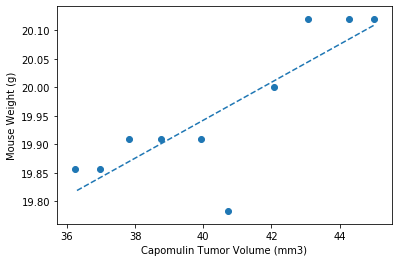

In [69]:
tumor = capumolin.iloc[:,4]
weight = capumolin.iloc[:,3]

vc_slope, vc_int, vc_r, vc_p, vc_std_err = linregress(tumor, weight)
vc_fit = vc_slope * tumor + vc_int

plt.plot(tumor,vc_fit,"--")
line_eq = "y = " + str(round(vc_slope,2)) + "x + " + str(round(vc_int,2))

plt.scatter(tumor, weight)
plt.ylabel('Mouse Weight (g)')
plt.xlabel('Capomulin Tumor Volume (mm3)')
plt.show()